In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

a## Aim of the following project is to predict maximal temperature on a given day

I used a datset containing informations about temperature (at various points of the day), speed and direction of the wind, rain fall and humidity in Australia. The data was colected everyday from 1.12.2008 to 25.6.2017 in various places in Australia. Goal is to first test various machine learning methods using a part of the dataset, pick the best and then use it to make predictions for whole dataset.

Dataset can be found here: 
    https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [ ]:
# Defining parameters for plots

plt.rc('figure', figsize = (12,10), autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


In [ ]:
# Creation of workspace 
cwd = os.getcwd()
os.makedirs(os.path.join(cwd,'dataset'),exist_ok = True)
os.makedirs(os.path.join(cwd,'plots'),exist_ok = True)
os.makedirs(os.path.join(cwd,'plots','clusterization'),exist_ok = True)

In [ ]:
# Loading of dataset 
path_to_dataset = os.path.join(cwd,'dataset','weatherAUS.csv')

if os.path.exists(path_to_dataset):
  df = pd.read_csv(path_to_dataset)
  if not df.empty:
    print('Manage to open dataset')
  else:
      print(f'Dataset was found but couldnt be loaded into script')
else:
  print(f'Dataset not found')

In [ ]:
df.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Next step is to remove all the rows missing values 

In [ ]:
df = df.drop(columns = ['Date','Location','Evaporation','Sunshine','WindGustDir','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm','RainToday','RainTomorrow'])
df

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145455      2.8     23.4       0.0           31.0          13.0          11.0   
145456      3.6     25.3       0.0           22.0          13.0           9.0   
145457      5.4     26.9       0.0           37.0           9.0           9.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   
145459     14.9      NaN       0.0            NaN          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  
0              71.0         22.0       1007.7       1007.1     16.9     21.8  
1              44.0         25.0       1010.6       1007.8     17.2     24.3  
2              38.0         30.0       1007.6       1008.7     21.0     23.2  
3              45.0         16.0       1017.6       1012.8     18.1     26.5  
4              82.0         33.0       1010.8       1006.0     17.8     29.7  
...             ...          ...          ...          ...      ...      ...  
145455         51.0         24.0       1024.6       1020.3     10.1     22.4  
145456         56.0         21.0       1023.5       1019.1     10.9     24.5  
145457         53.0         24.0       1021.0       1016.8     12.5     26.1  
145458         51.0         24.0       1019.4       1016.5     15.1     26.0  
145459         62.0         36.0       1020.2       1017.9     15.0     20.9  

[145460 rows x 12 columns]

In [ ]:
df = df.dropna(subset = 
               ['MaxTemp','MinTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am',
                'Pressure3pm','WindSpeed9am','WindSpeed3pm','Temp9am','Temp3pm']
              ).reset_index(drop = True)
                          
df

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
120376      3.5     21.8       0.0           31.0          15.0          13.0   
120377      2.8     23.4       0.0           31.0          13.0          11.0   
120378      3.6     25.3       0.0           22.0          13.0           9.0   
120379      5.4     26.9       0.0           37.0           9.0           9.0   
120380      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  
0              71.0         22.0       1007.7       1007.1     16.9     21.8  
1              44.0         25.0       1010.6       1007.8     17.2     24.3  
2              38.0         30.0       1007.6       1008.7     21.0     23.2  
3              45.0         16.0       1017.6       1012.8     18.1     26.5  
4              82.0         33.0       1010.8       1006.0     17.8     29.7  
...             ...          ...          ...          ...      ...      ...  
120376         59.0         27.0       1024.7       1021.2      9.4     20.9  
120377         51.0         24.0       1024.6       1020.3     10.1     22.4  
120378         56.0         21.0       1023.5       1019.1     10.9     24.5  
120379         53.0         24.0       1021.0       1016.8     12.5     26.1  
120380         51.0         24.0       1019.4       1016.5     15.1     26.0  

[120381 rows x 12 columns]

In [ ]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
df.corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.730739  0.110935       0.196256      0.201981   
MaxTemp        0.730739  1.000000 -0.070200       0.088702      0.031528   
Rainfall       0.110935 -0.070200  1.000000       0.132392      0.089165   
WindGustSpeed  0.196256  0.088702  0.132392       1.000000      0.601903   
WindSpeed9am   0.201981  0.031528  0.089165       0.601903      1.000000   
WindSpeed3pm   0.174687  0.043341  0.062301       0.689332      0.513789   
Humidity9am   -0.245620 -0.523502  0.225778      -0.219668     -0.269289   
Humidity3pm    0.022318 -0.498374  0.256864      -0.035179     -0.028982   
Pressure9am   -0.452100 -0.329177 -0.169731      -0.458764     -0.230570   
Pressure3pm   -0.462730 -0.423018 -0.129395      -0.414724     -0.179941   
Temp9am        0.902983  0.882848  0.016635       0.166427      0.146451   
Temp3pm        0.705470  0.984640 -0.074385       0.049200      0.015577   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.174687    -0.245620     0.022318    -0.452100   
MaxTemp            0.043341    -0.523502    -0.498374    -0.329177   
Rainfall           0.062301     0.225778     0.256864    -0.169731   
WindGustSpeed      0.689332    -0.219668    -0.035179    -0.458764   
WindSpeed9am       0.513789    -0.269289    -0.028982    -0.230570   
WindSpeed3pm       1.000000    -0.132562     0.032626    -0.300417   
Humidity9am       -0.132562     1.000000     0.674931     0.142006   
Humidity3pm        0.032626     0.674931     1.000000    -0.027894   
Pressure9am       -0.300417     0.142006    -0.027894     1.000000   
Pressure3pm       -0.261459     0.189545     0.051159     0.961605   
Temp9am            0.160530    -0.483135    -0.203435    -0.420716   
Temp3pm            0.016900    -0.515278    -0.547537    -0.287042   

               Pressure3pm   Temp9am   Temp3pm  
MinTemp          -0.462730  0.902983  0.705470  
MaxTemp          -0.423018  0.882848  0.984640  
Rainfall         -0.129395  0.016635 -0.074385  
WindGustSpeed    -0.414724  0.166427  0.049200  
WindSpeed9am     -0.179941  0.146451  0.015577  
WindSpeed3pm     -0.261459  0.160530  0.016900  
Humidity9am       0.189545 -0.483135 -0.515278  
Humidity3pm       0.051159 -0.203435 -0.547537  
Pressure9am       0.961605 -0.420716 -0.287042  
Pressure3pm       1.000000 -0.467930 -0.389931  
Temp9am          -0.467930  1.000000  0.857449  
Temp3pm          -0.389931  0.857449  1.000000

Next I explore correlation between max temperature ( predicted value) and all the descriptors. In case of low correlation feature is excluded from the model. After analysis and research i decided to keep: Humidity9am, Humidity3pm,Pressure9am and Pressure3pm.

In [ ]:
df.corr().iloc[1:2,:]

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MaxTemp  0.730739      1.0   -0.0702       0.088702      0.031528   

         WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
MaxTemp      0.043341    -0.523502    -0.498374    -0.329177    -0.423018   

          Temp9am  Temp3pm  
MaxTemp  0.882848  0.98464

In [ ]:
df = df.drop(columns = ['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm'])
df

MinTemp  MaxTemp  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0          13.4     22.9         71.0         22.0       1007.7       1007.1   
1           7.4     25.1         44.0         25.0       1010.6       1007.8   
2          12.9     25.7         38.0         30.0       1007.6       1008.7   
3           9.2     28.0         45.0         16.0       1017.6       1012.8   
4          17.5     32.3         82.0         33.0       1010.8       1006.0   
...         ...      ...          ...          ...          ...          ...   
120376      3.5     21.8         59.0         27.0       1024.7       1021.2   
120377      2.8     23.4         51.0         24.0       1024.6       1020.3   
120378      3.6     25.3         56.0         21.0       1023.5       1019.1   
120379      5.4     26.9         53.0         24.0       1021.0       1016.8   
120380      7.8     27.0         51.0         24.0       1019.4       1016.5   

        Temp9am  Temp3pm  
0          16.9     21.8  
1          17.2     24.3  
2          21.0     23.2  
3          18.1     26.5  
4          17.8     29.7  
...         ...      ...  
120376      9.4     20.9  
120377     10.1     22.4  
120378     10.9     24.5  
120379     12.5     26.1  
120380     15.1     26.0  

[120381 rows x 8 columns]

## Data exploration and further cleaning

Next step was elimination of outliers 

In [ ]:
df.describe()

MinTemp        MaxTemp    Humidity9am    Humidity3pm  \
count  120381.000000  120381.000000  120381.000000  120381.000000   
mean       12.389799      23.483577      68.297763      50.883661   
std         6.363247       6.983391      19.118195      20.689518   
min        -8.200000       2.600000       0.000000       0.000000   
25%         7.800000      18.100000      56.000000      36.000000   
50%        12.100000      22.900000      69.000000      51.000000   
75%        17.000000      28.500000      82.000000      65.000000   
max        33.900000      48.100000     100.000000     100.000000   

        Pressure9am    Pressure3pm        Temp9am        Temp3pm  
count  120381.00000  120381.000000  120381.000000  120381.000000  
mean     1017.65436    1015.252720      17.186919      21.975789  
std         7.09824       7.018676       6.445453       6.829740  
min       980.50000     977.100000      -3.100000       1.700000  
25%      1013.00000    1010.500000      12.400000      16.800000  
50%      1017.60000    1015.200000      16.800000      21.400000  
75%      1022.40000    1020.000000      21.800000      26.700000  
max      1041.00000    1039.600000      40.200000      46.700000

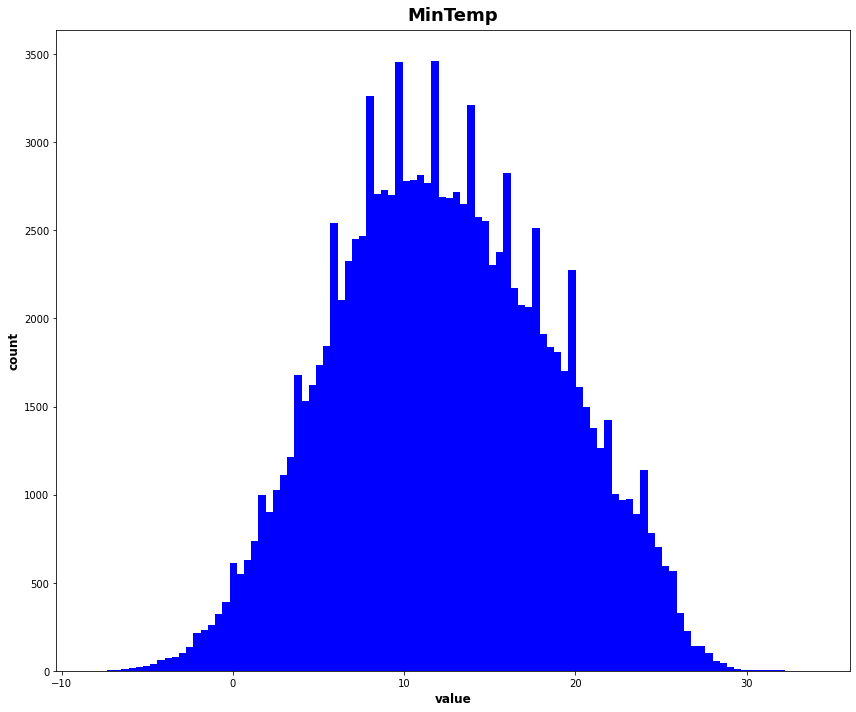

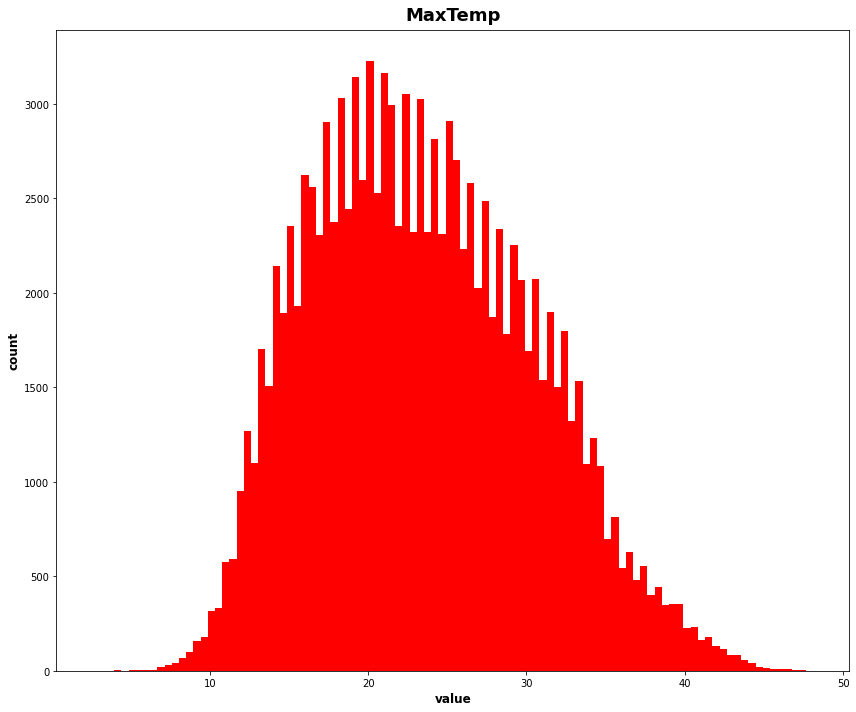

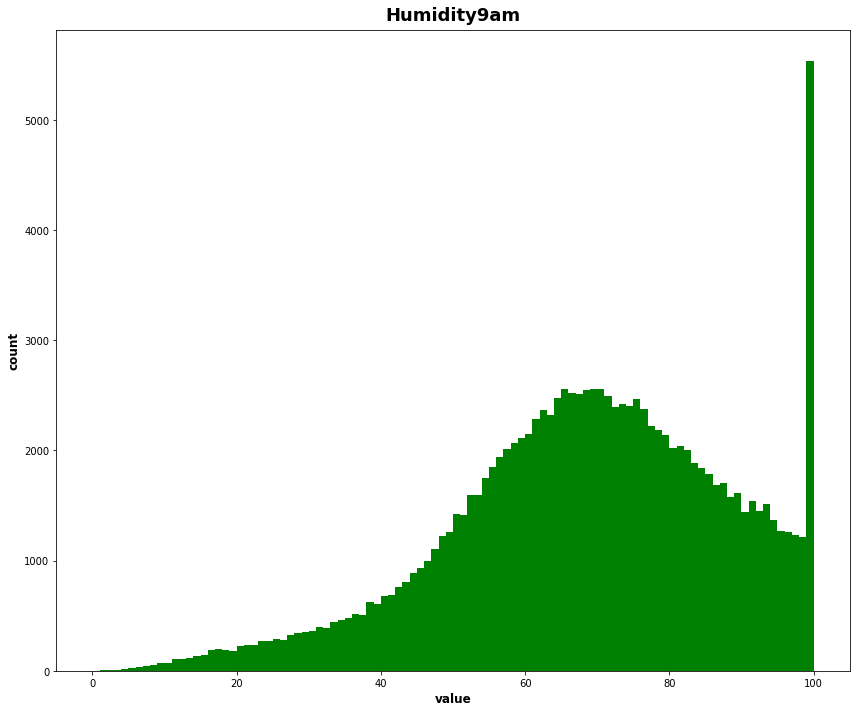

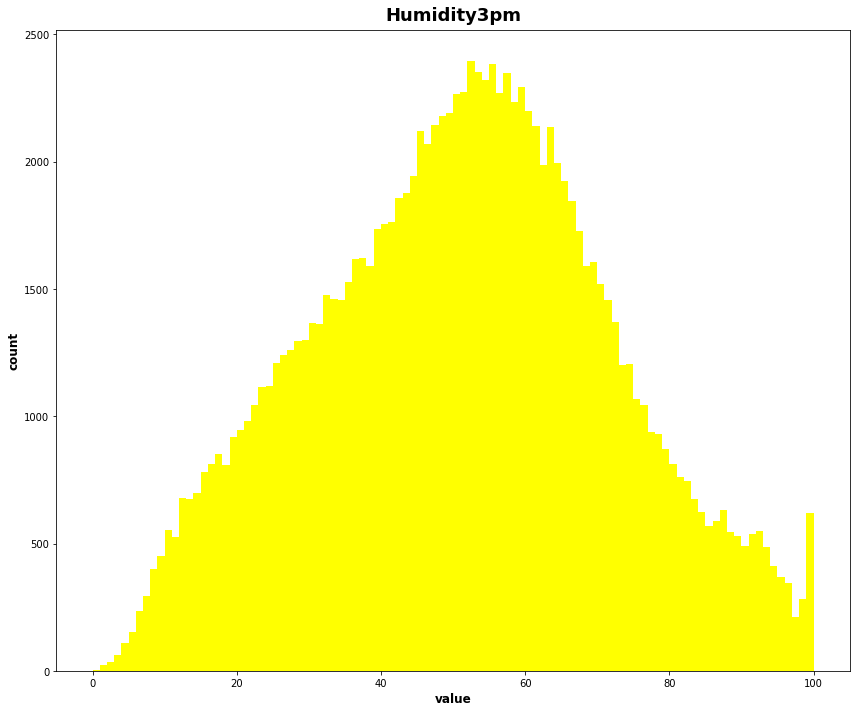

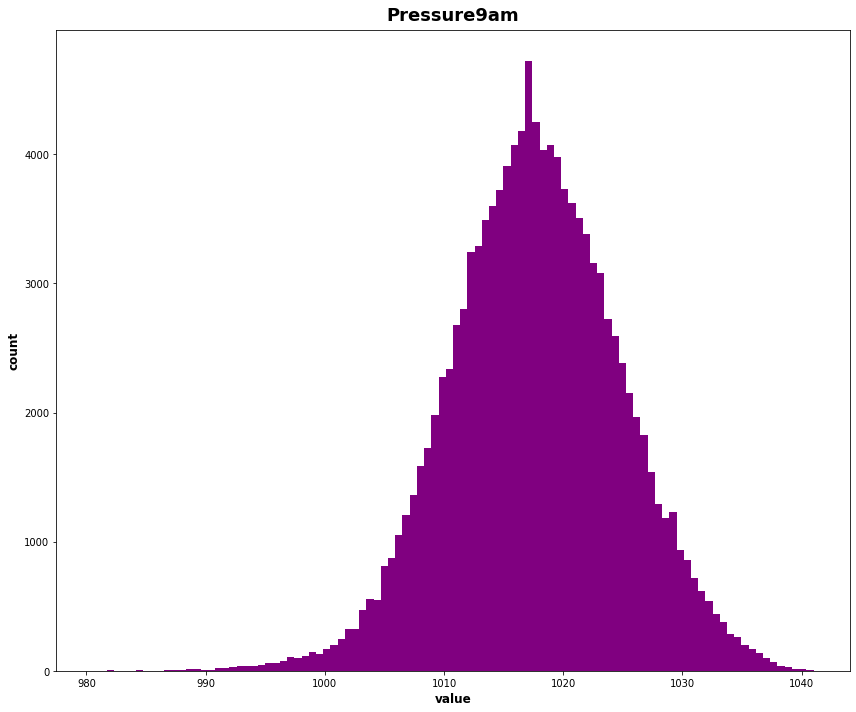

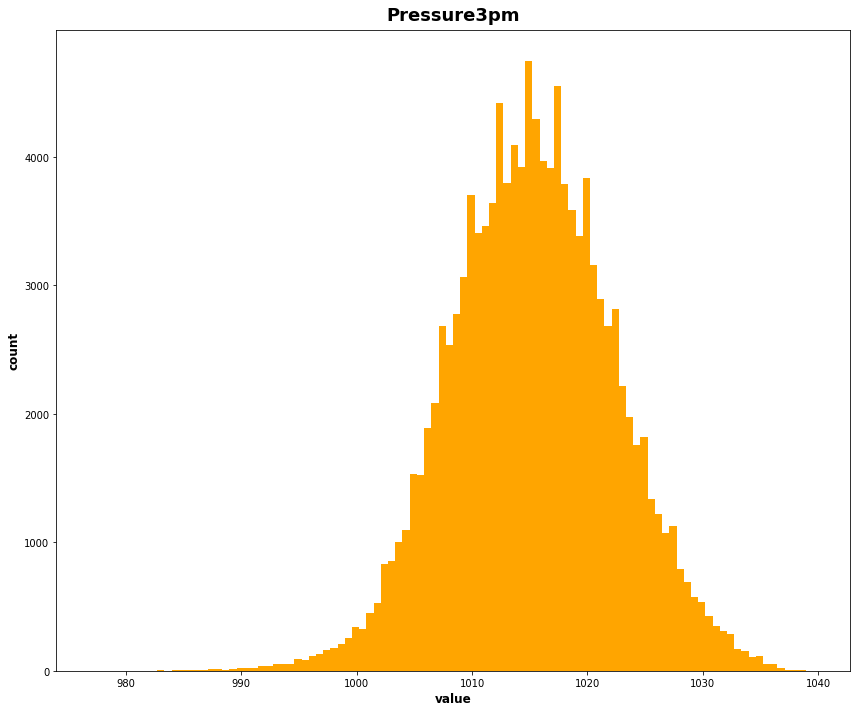

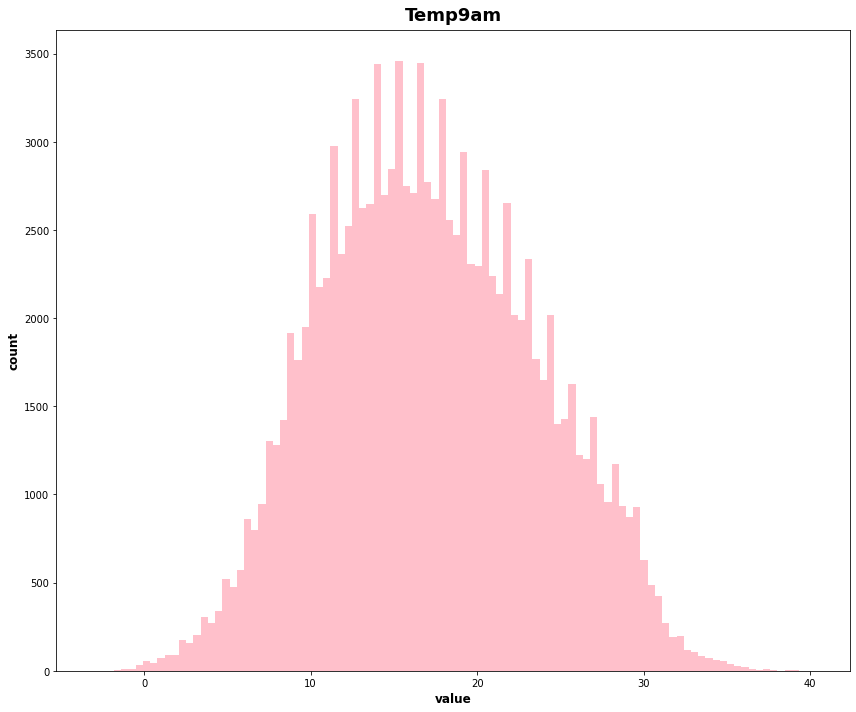

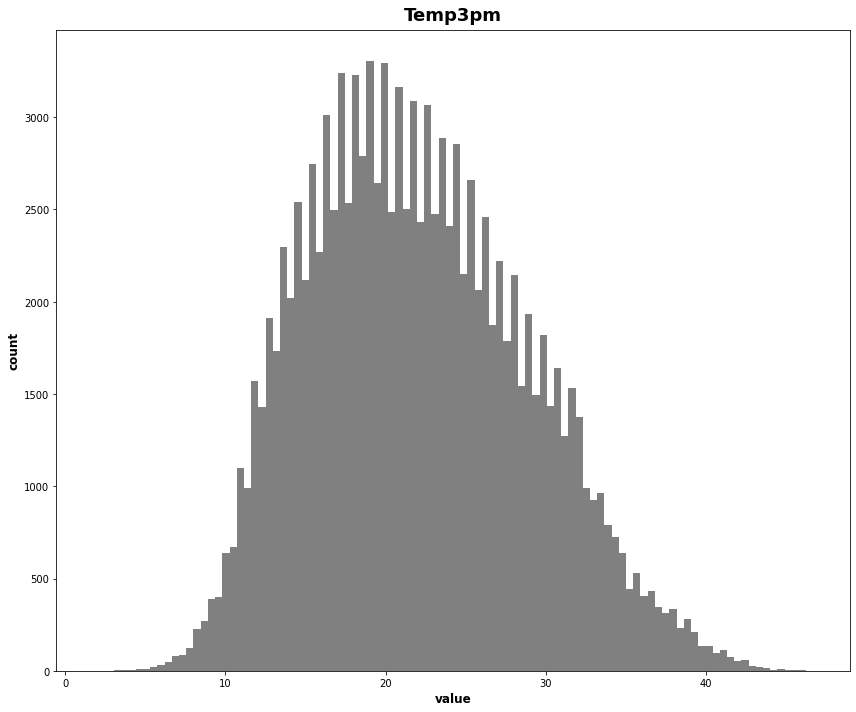

In [ ]:
plt.hist(df['MinTemp'],bins = 100, color = 'blue')
plt.title('MinTemp')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','MinTemp_initial_histograms.png'))
plt.show()

plt.hist(df['MaxTemp'],bins = 100, color = 'red')
plt.title('MaxTemp')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','MaxTemp_initial_histograms.png'))
plt.show()

plt.hist(df['Humidity9am'],bins = 100, color = 'green')
plt.title('Humidity9am')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Humidity9am_initial_histograms.png'))
plt.show()

plt.hist(df['Humidity3pm'],bins = 100, color = 'yellow')
plt.title('Humidity3pm')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Humidity3pm_initial_histograms.png'))
plt.show()

plt.hist(df['Pressure9am'],bins = 100, color = 'purple')
plt.title('Pressure9am')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Pressure9am_initial_histograms.png'))
plt.show()

plt.hist(df['Pressure3pm'],bins = 100, color = 'orange')
plt.title('Pressure3pm')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Pressure3pm_initial_histograms.png'))
plt.show()

plt.hist(df['Temp9am'],bins = 100, color = 'pink')
plt.title('Temp9am')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Temp9am_initial_histograms.png'))
plt.show()

plt.hist(df['Temp3pm'],bins = 100, color = 'grey')
plt.title('Temp3pm')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Temp3pm_initial_histograms.png'))
plt.show()

In [ ]:
df

MinTemp  MaxTemp  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0          13.4     22.9         71.0         22.0       1007.7       1007.1   
1           7.4     25.1         44.0         25.0       1010.6       1007.8   
2          12.9     25.7         38.0         30.0       1007.6       1008.7   
3           9.2     28.0         45.0         16.0       1017.6       1012.8   
4          17.5     32.3         82.0         33.0       1010.8       1006.0   
...         ...      ...          ...          ...          ...          ...   
120376      3.5     21.8         59.0         27.0       1024.7       1021.2   
120377      2.8     23.4         51.0         24.0       1024.6       1020.3   
120378      3.6     25.3         56.0         21.0       1023.5       1019.1   
120379      5.4     26.9         53.0         24.0       1021.0       1016.8   
120380      7.8     27.0         51.0         24.0       1019.4       1016.5   

        Temp9am  Temp3pm  
0          16.9     21.8  
1          17.2     24.3  
2          21.0     23.2  
3          18.1     26.5  
4          17.8     29.7  
...         ...      ...  
120376      9.4     20.9  
120377     10.1     22.4  
120378     10.9     24.5  
120379     12.5     26.1  
120380     15.1     26.0  

[120381 rows x 8 columns]

In case of most descriptors there were some outliers. Given how few there were i just decided to remove those from the data based on visuall analysis of plots.

In [ ]:
df = df[df['MinTemp'] > -5]
df = df[df['MinTemp'] < 26] 
df = df[df['MaxTemp'] > 8]
df = df[df['MaxTemp'] < 40]
df = df[df['Humidity9am'] > 20]
df = df[df['Humidity3pm'] > 10]
df = df[df['Pressure9am'] > 1003]
df = df[df['Pressure9am'] < 1035]
df = df[df['Pressure3pm'] > 1000]
df = df[df['Pressure3pm'] < 1030]
df = df[df['Temp9am'] > 5]
df = df[df['Temp9am'] < 31]
df = df[df['Temp3pm'] > 10]
df = df[df['Temp3pm'] < 36]

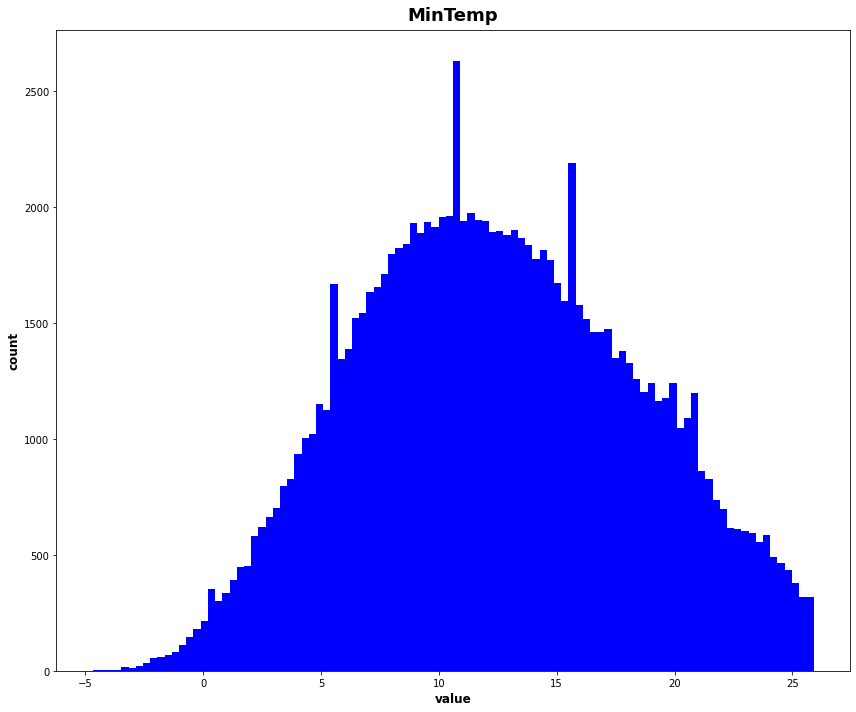

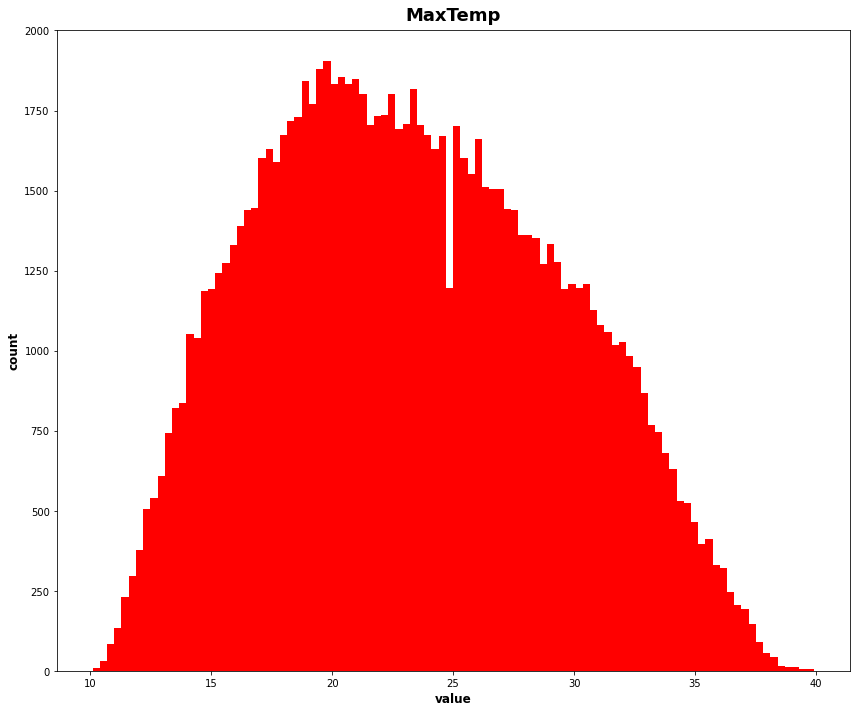

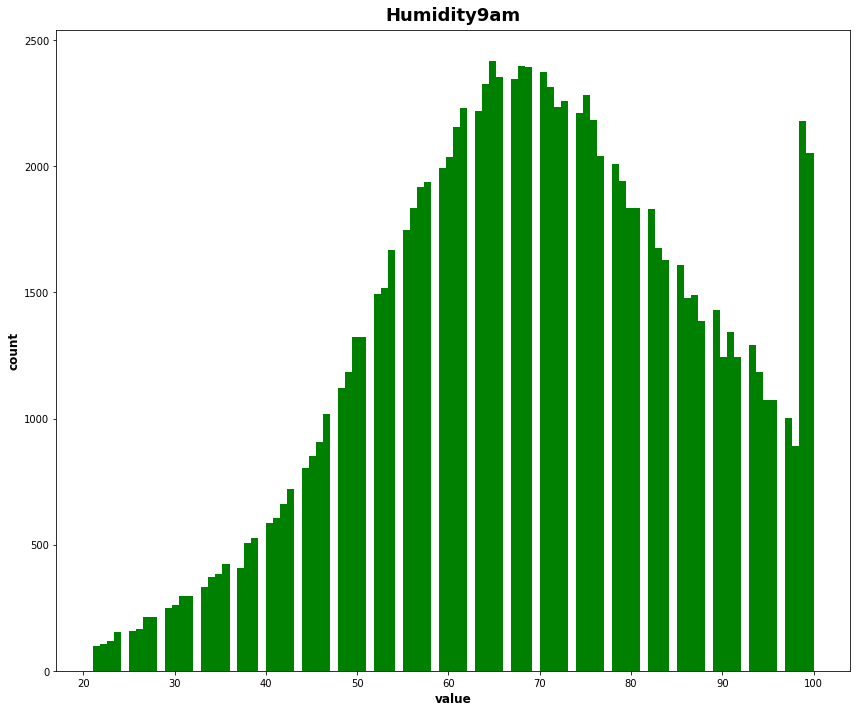

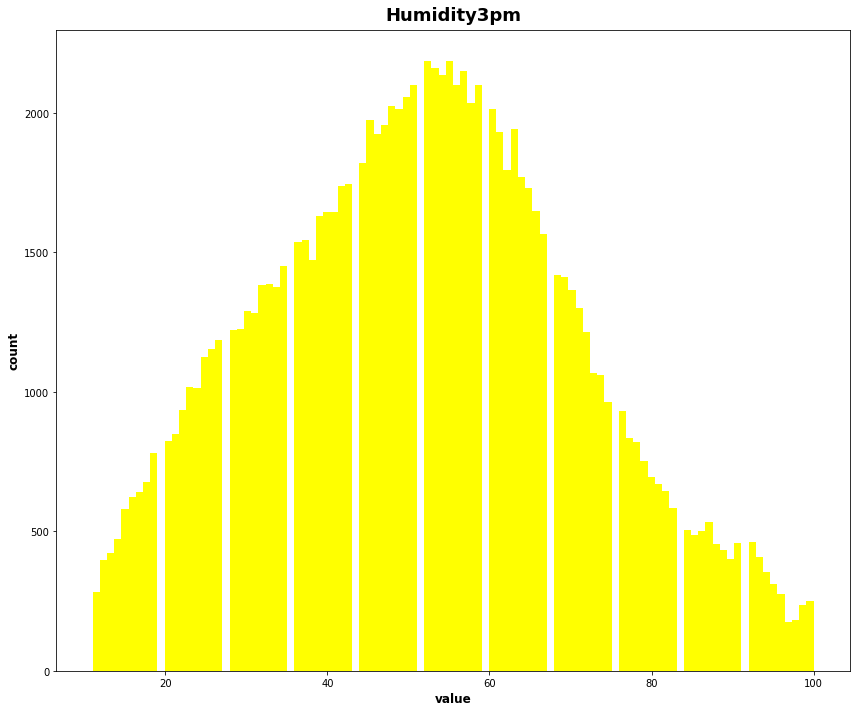

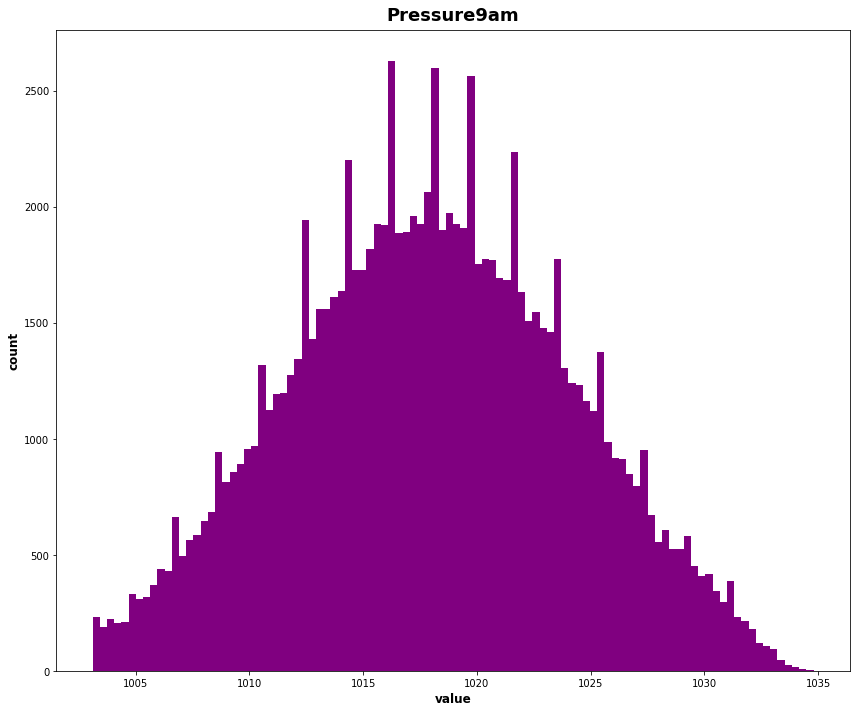

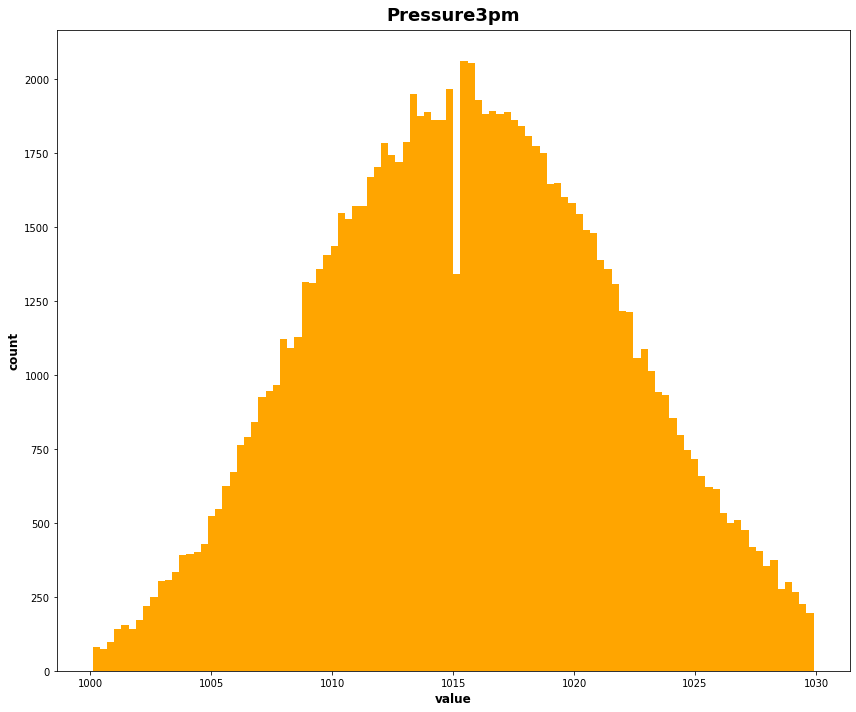

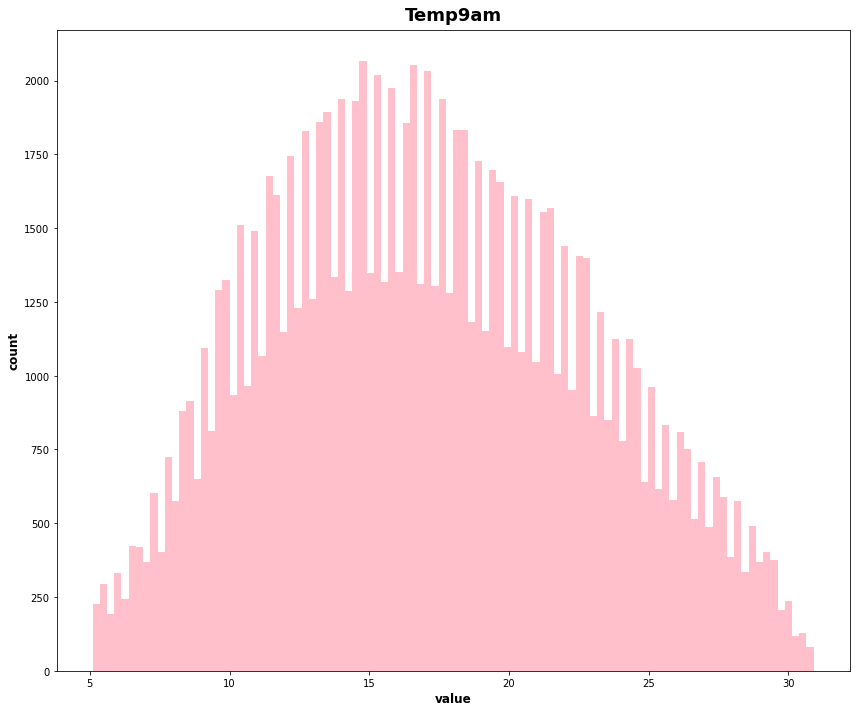

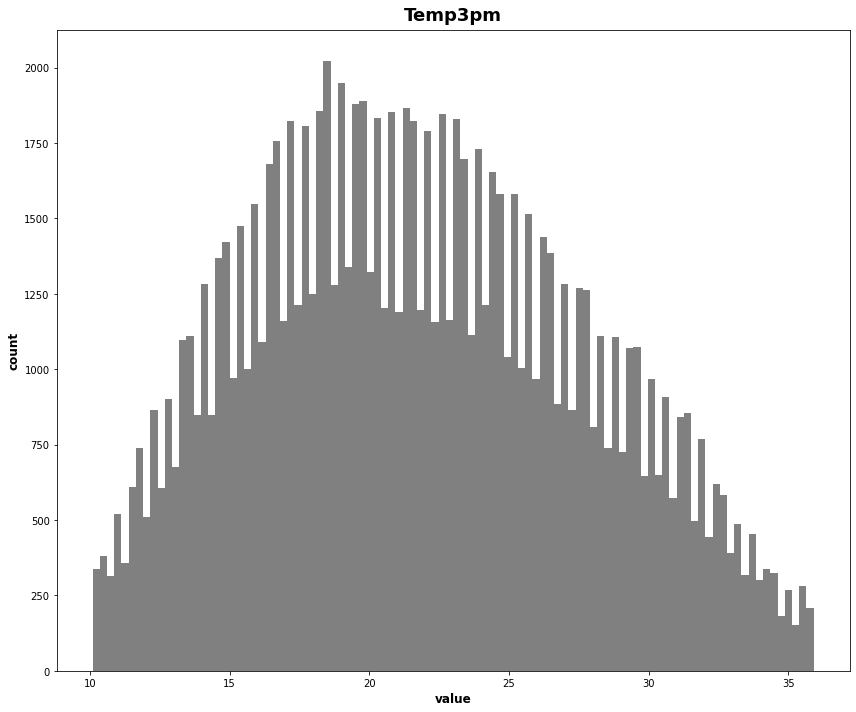

In [ ]:
plt.hist(df['MinTemp'],bins = 100, color = 'blue')
plt.title('MinTemp')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','MinTemp_histograms_after_triming.png'))
plt.show()

plt.hist(df['MaxTemp'],bins = 100, color = 'red')
plt.title('MaxTemp')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','MaxTemp_histograms_after_triming.png'))
plt.show()

plt.hist(df['Humidity9am'],bins = 100, color = 'green')
plt.title('Humidity9am')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Humidity9am_histograms_after_triming.png'))
plt.show()

plt.hist(df['Humidity3pm'],bins = 100, color = 'yellow')
plt.title('Humidity3pm')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Humidity3pm_histograms_after_triming.png'))
plt.show()

plt.hist(df['Pressure9am'],bins = 100, color = 'purple')
plt.title('Pressure9am')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Pressure9am_histograms_after_triming.png'))
plt.show()

plt.hist(df['Pressure3pm'],bins = 100, color = 'orange')
plt.title('Pressure3pm')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Pressure3pm_histograms_after_triming.png'))
plt.show()

plt.hist(df['Temp9am'],bins = 100, color = 'pink')
plt.title('Temp9am')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Temp9am_histograms_after_triming.png'))
plt.show()

plt.hist(df['Temp3pm'],bins = 100, color = 'grey')
plt.title('Temp3pm')
plt.xlabel('value')
plt.ylabel('count')
plt.savefig(os.path.join(cwd,'plots','Temp3pm_histograms_after_triming.png'))
plt.show()

In [ ]:
df.describe()

MinTemp        MaxTemp    Humidity9am    Humidity3pm  \
count  106011.000000  106011.000000  106011.000000  106011.000000   
mean       12.449133      23.313747      69.161738      51.691419   
std         5.908633       6.084953      17.136708      19.390476   
min        -4.700000      10.100000      21.000000      11.000000   
25%         8.100000      18.500000      57.000000      37.000000   
50%        12.200000      23.000000      69.000000      52.000000   
75%        16.800000      27.900000      82.000000      65.000000   
max        25.900000      39.900000     100.000000     100.000000   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  
count  106011.000000  106011.000000  106011.000000  106011.000000  
mean     1017.968403    1015.576564      17.160293      21.821496  
std         6.143807       6.070430       5.698112       5.918953  
min      1003.100000    1000.100000       5.100000      10.100000  
25%      1013.600000    1011.200000      12.800000      17.200000  
50%      1017.900000    1015.500000      16.800000      21.400000  
75%      1022.300000    1019.900000      21.400000      26.200000  
max      1034.800000    1029.900000      30.900000      35.900000

## Clusterization

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(df)
pred = kmeans.predict(df)

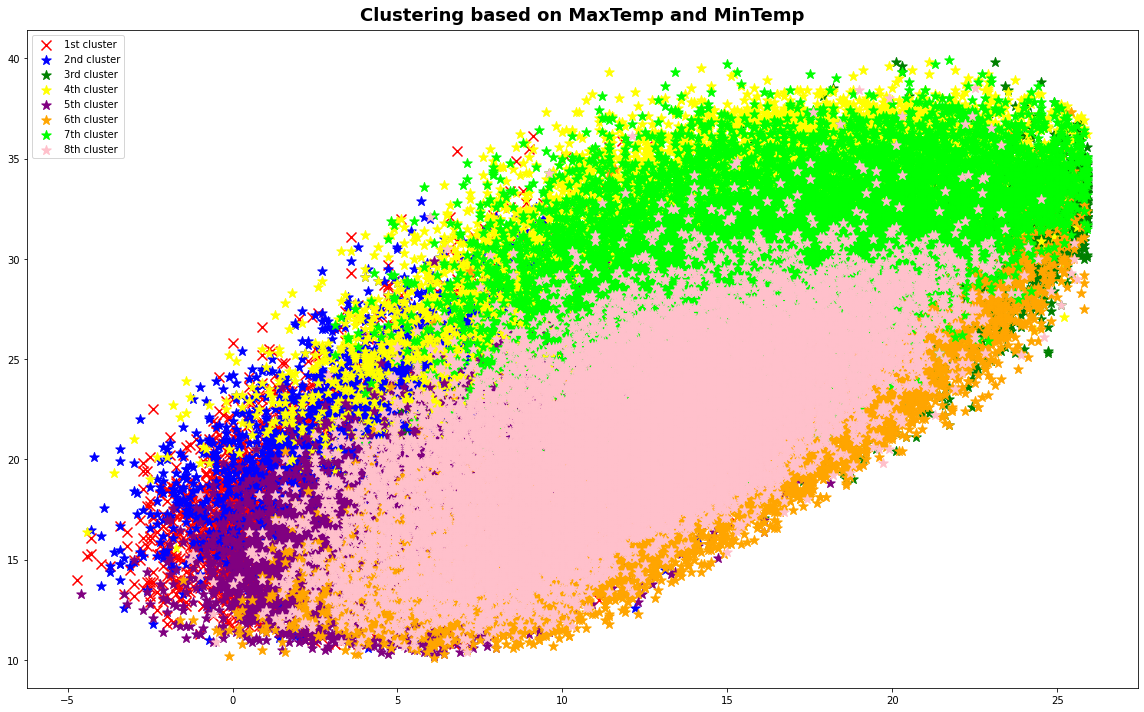

In [ ]:
plt.scatter(df[pred==0][df.columns[0]], df[pred==0][df.columns[1]], s=100, c = 'red', marker = 'x',label = '1st cluster')
plt.scatter(df[pred==1][df.columns[0]], df[pred==1][df.columns[1]], s=100, c = 'blue', marker = '*',label = '2nd cluster')
plt.scatter(df[pred==2][df.columns[0]], df[pred==2][df.columns[1]], s=100, c = 'green', marker = '*',label = '3rd cluster')
plt.scatter(df[pred==3][df.columns[0]], df[pred==3][df.columns[1]], s=100, c = 'yellow', marker = '*',label = '4th cluster')
plt.scatter(df[pred==4][df.columns[0]], df[pred==4][df.columns[1]], s=100, c = 'purple', marker = '*',label = '5th cluster')
plt.scatter(df[pred==5][df.columns[0]], df[pred==5][df.columns[1]], s=100, c = 'orange', marker = '*',label = '6th cluster')
plt.scatter(df[pred==6][df.columns[0]], df[pred==6][df.columns[1]], s=100, c = 'lime', marker = '*',label = '7th cluster')
plt.scatter(df[pred==7][df.columns[0]], df[pred==7][df.columns[1]], s=100, c = 'pink', marker = '*',label = '8th cluster')
plt.title(label = 'Clustering based on MaxTemp and MinTemp')
plt.legend()
plt.savefig(os.path.join(cwd,'plots','clusterization','Clustering_MaxTempo_MinTemp.png'),dpi = 400)
plt.show()

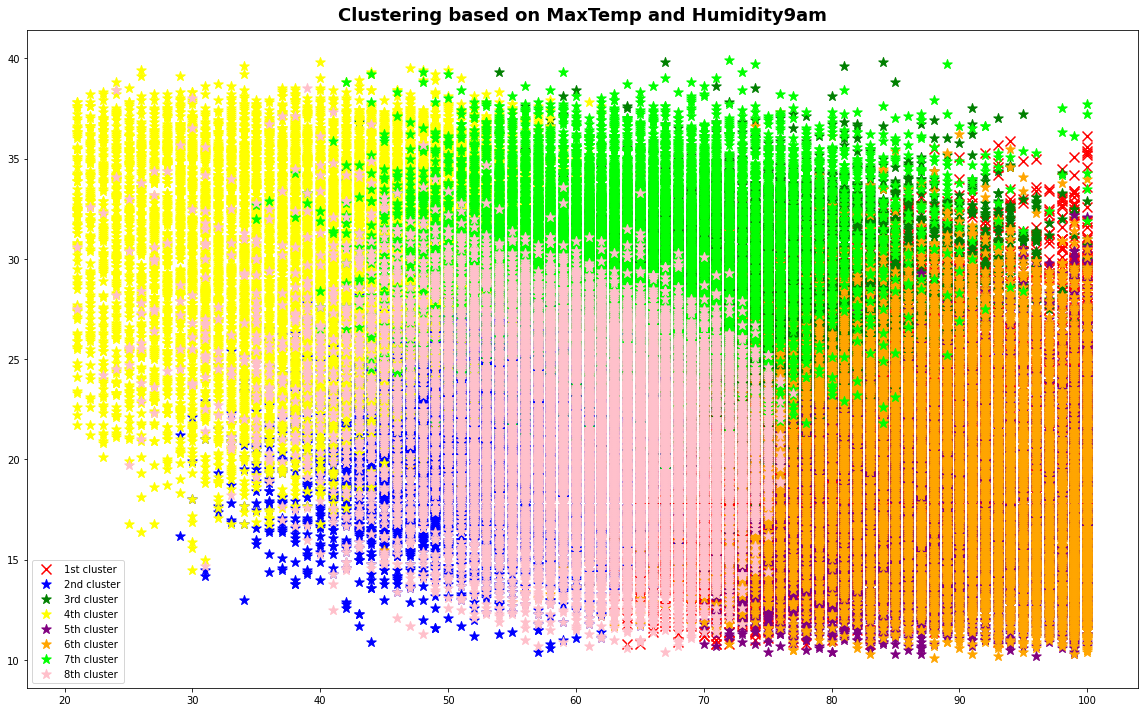

In [ ]:
plt.scatter(df[pred==0][df.columns[2]], df[pred==0][df.columns[1]], s=100, c = 'red', marker = 'x',label = '1st cluster')
plt.scatter(df[pred==1][df.columns[2]], df[pred==1][df.columns[1]], s=100, c = 'blue', marker = '*',label = '2nd cluster')
plt.scatter(df[pred==2][df.columns[2]], df[pred==2][df.columns[1]], s=100, c = 'green', marker = '*',label = '3rd cluster')
plt.scatter(df[pred==3][df.columns[2]], df[pred==3][df.columns[1]], s=100, c = 'yellow', marker = '*',label = '4th cluster')
plt.scatter(df[pred==4][df.columns[2]], df[pred==4][df.columns[1]], s=100, c = 'purple', marker = '*',label = '5th cluster')
plt.scatter(df[pred==5][df.columns[2]], df[pred==5][df.columns[1]], s=100, c = 'orange', marker = '*',label = '6th cluster')
plt.scatter(df[pred==6][df.columns[2]], df[pred==6][df.columns[1]], s=100, c = 'lime', marker = '*',label = '7th cluster')
plt.scatter(df[pred==7][df.columns[2]], df[pred==7][df.columns[1]], s=100, c = 'pink', marker = '*',label = '8th cluster')
plt.title(label = 'Clustering based on MaxTemp and Humidity9am')
plt.legend()
plt.savefig(os.path.join(cwd,'plots','clusterization','Clustering_MaxTempo_Humidity9am.png'),dpi = 400)
plt.show()

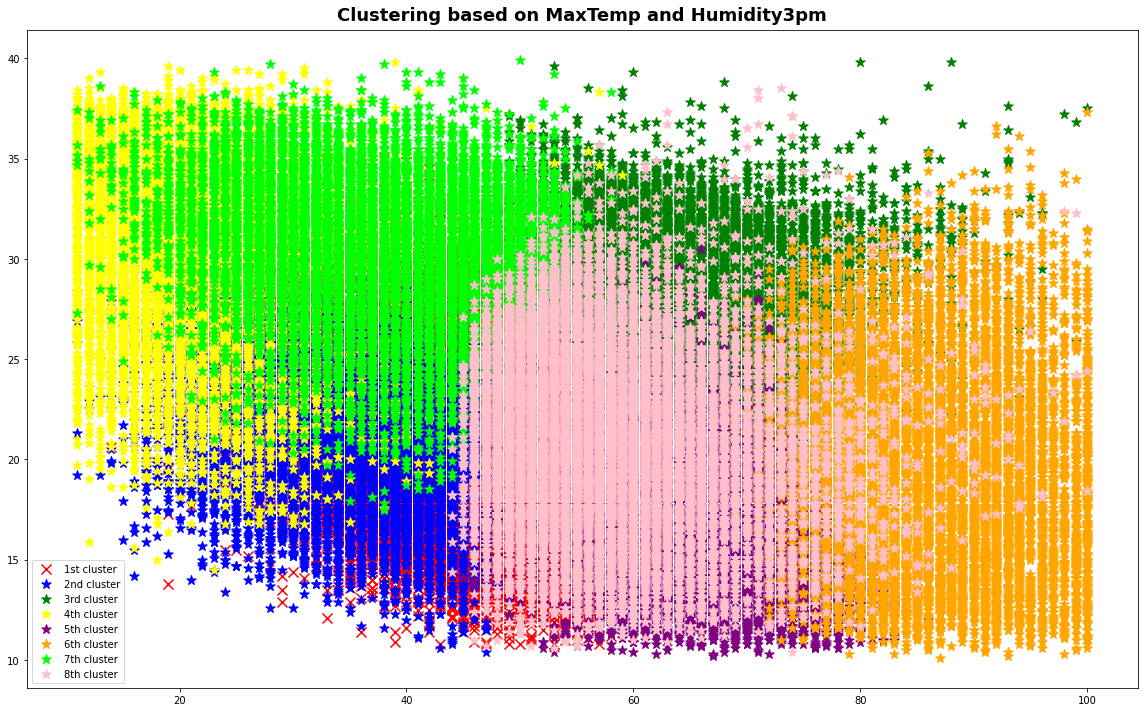

In [ ]:
plt.scatter(df[pred==0][df.columns[3]], df[pred==0][df.columns[1]], s=100, c = 'red', marker = 'x',label = '1st cluster')
plt.scatter(df[pred==1][df.columns[3]], df[pred==1][df.columns[1]], s=100, c = 'blue', marker = '*',label = '2nd cluster')
plt.scatter(df[pred==2][df.columns[3]], df[pred==2][df.columns[1]], s=100, c = 'green', marker = '*',label = '3rd cluster')
plt.scatter(df[pred==3][df.columns[3]], df[pred==3][df.columns[1]], s=100, c = 'yellow', marker = '*',label = '4th cluster')
plt.scatter(df[pred==4][df.columns[3]], df[pred==4][df.columns[1]], s=100, c = 'purple', marker = '*',label = '5th cluster')
plt.scatter(df[pred==5][df.columns[3]], df[pred==5][df.columns[1]], s=100, c = 'orange', marker = '*',label = '6th cluster')
plt.scatter(df[pred==6][df.columns[3]], df[pred==6][df.columns[1]], s=100, c = 'lime', marker = '*',label = '7th cluster')
plt.scatter(df[pred==7][df.columns[3]], df[pred==7][df.columns[1]], s=100, c = 'pink', marker = '*',label = '8th cluster')
plt.title(label = 'Clustering based on MaxTemp and Humidity3pm')
plt.legend()
plt.savefig(os.path.join(cwd,'plots','clusterization','Clustering_MaxTempo_Humidity3pm.png'),dpi = 400)
plt.show()

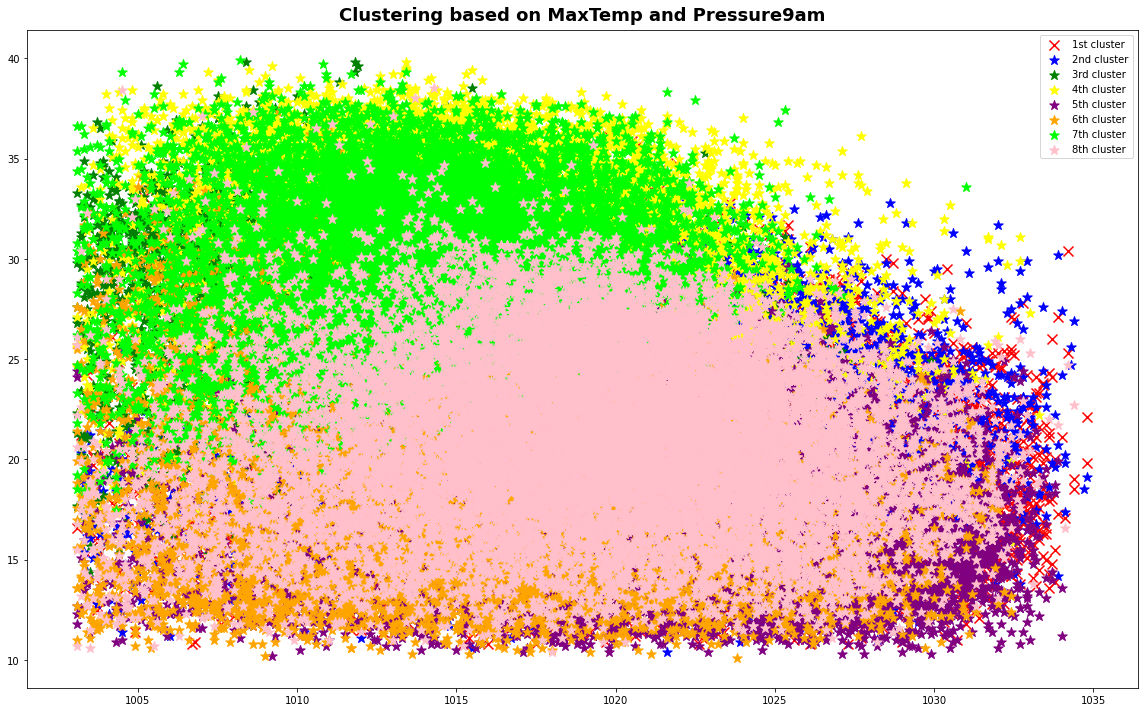

In [ ]:
plt.scatter(df[pred==0][df.columns[4]], df[pred==0][df.columns[1]], s=100, c = 'red', marker = 'x',label = '1st cluster')
plt.scatter(df[pred==1][df.columns[4]], df[pred==1][df.columns[1]], s=100, c = 'blue', marker = '*',label = '2nd cluster')
plt.scatter(df[pred==2][df.columns[4]], df[pred==2][df.columns[1]], s=100, c = 'green', marker = '*',label = '3rd cluster')
plt.scatter(df[pred==3][df.columns[4]], df[pred==3][df.columns[1]], s=100, c = 'yellow', marker = '*',label = '4th cluster')
plt.scatter(df[pred==4][df.columns[4]], df[pred==4][df.columns[1]], s=100, c = 'purple', marker = '*',label = '5th cluster')
plt.scatter(df[pred==5][df.columns[4]], df[pred==5][df.columns[1]], s=100, c = 'orange', marker = '*',label = '6th cluster')
plt.scatter(df[pred==6][df.columns[4]], df[pred==6][df.columns[1]], s=100, c = 'lime', marker = '*',label = '7th cluster')
plt.scatter(df[pred==7][df.columns[4]], df[pred==7][df.columns[1]], s=100, c = 'pink', marker = '*',label = '8th cluster')
plt.title(label = 'Clustering based on MaxTemp and Pressure9am')
plt.legend()
plt.savefig(os.path.join(cwd,'plots','clusterization','Clustering_MaxTempo_Pressure9am.png'),dpi = 400)
plt.show()

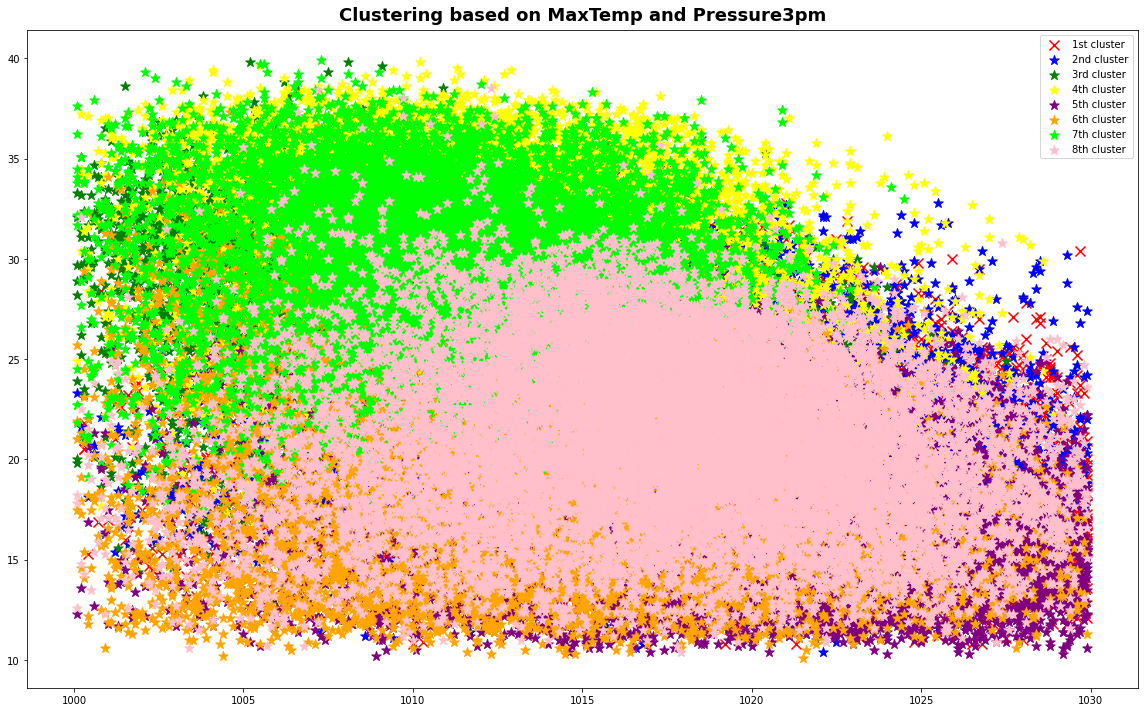

In [ ]:
plt.scatter(df[pred==0][df.columns[5]], df[pred==0][df.columns[1]], s=100, c = 'red', marker = 'x',label = '1st cluster')
plt.scatter(df[pred==1][df.columns[5]], df[pred==1][df.columns[1]], s=100, c = 'blue', marker = '*',label = '2nd cluster')
plt.scatter(df[pred==2][df.columns[5]], df[pred==2][df.columns[1]], s=100, c = 'green', marker = '*',label = '3rd cluster')
plt.scatter(df[pred==3][df.columns[5]], df[pred==3][df.columns[1]], s=100, c = 'yellow', marker = '*',label = '4th cluster')
plt.scatter(df[pred==4][df.columns[5]], df[pred==4][df.columns[1]], s=100, c = 'purple', marker = '*',label = '5th cluster')
plt.scatter(df[pred==5][df.columns[5]], df[pred==5][df.columns[1]], s=100, c = 'orange', marker = '*',label = '6th cluster')
plt.scatter(df[pred==6][df.columns[5]], df[pred==6][df.columns[1]], s=100, c = 'lime', marker = '*',label = '7th cluster')
plt.scatter(df[pred==7][df.columns[5]], df[pred==7][df.columns[1]], s=100, c = 'pink', marker = '*',label = '8th cluster')
plt.title(label = 'Clustering based on MaxTemp and Pressure3pm')
plt.legend()
plt.savefig(os.path.join(cwd,'plots','clusterization','Clustering_MaxTempo_Pressure3pm.png'),dpi = 400)
plt.show()

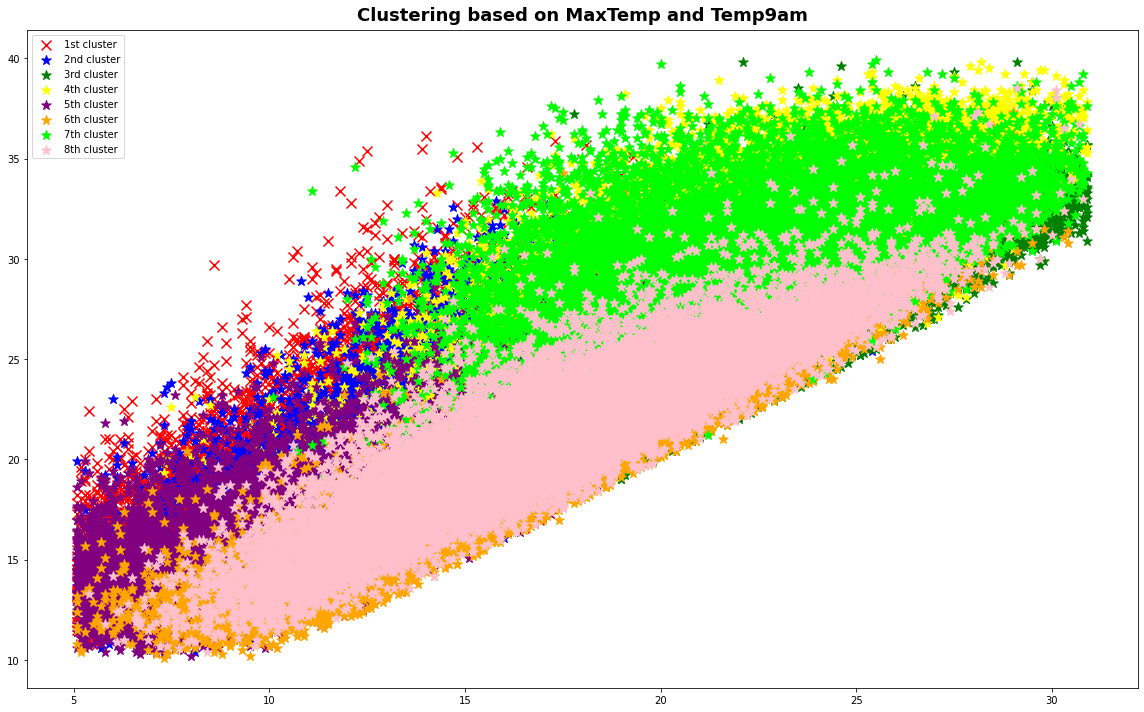

In [ ]:
plt.scatter(df[pred==0][df.columns[6]], df[pred==0][df.columns[1]], s=100, c = 'red', marker = 'x',label = '1st cluster')
plt.scatter(df[pred==1][df.columns[6]], df[pred==1][df.columns[1]], s=100, c = 'blue', marker = '*',label = '2nd cluster')
plt.scatter(df[pred==2][df.columns[6]], df[pred==2][df.columns[1]], s=100, c = 'green', marker = '*',label = '3rd cluster')
plt.scatter(df[pred==3][df.columns[6]], df[pred==3][df.columns[1]], s=100, c = 'yellow', marker = '*',label = '4th cluster')
plt.scatter(df[pred==4][df.columns[6]], df[pred==4][df.columns[1]], s=100, c = 'purple', marker = '*',label = '5th cluster')
plt.scatter(df[pred==5][df.columns[6]], df[pred==5][df.columns[1]], s=100, c = 'orange', marker = '*',label = '6th cluster')
plt.scatter(df[pred==6][df.columns[6]], df[pred==6][df.columns[1]], s=100, c = 'lime', marker = '*',label = '7th cluster')
plt.scatter(df[pred==7][df.columns[6]], df[pred==7][df.columns[1]], s=100, c = 'pink', marker = '*',label = '8th cluster')
plt.title(label = 'Clustering based on MaxTemp and Temp9am')
plt.legend()
plt.savefig(os.path.join(cwd,'plots','clusterization','Clustering_MaxTempo_Temp9am.png'),dpi = 400)
plt.show()

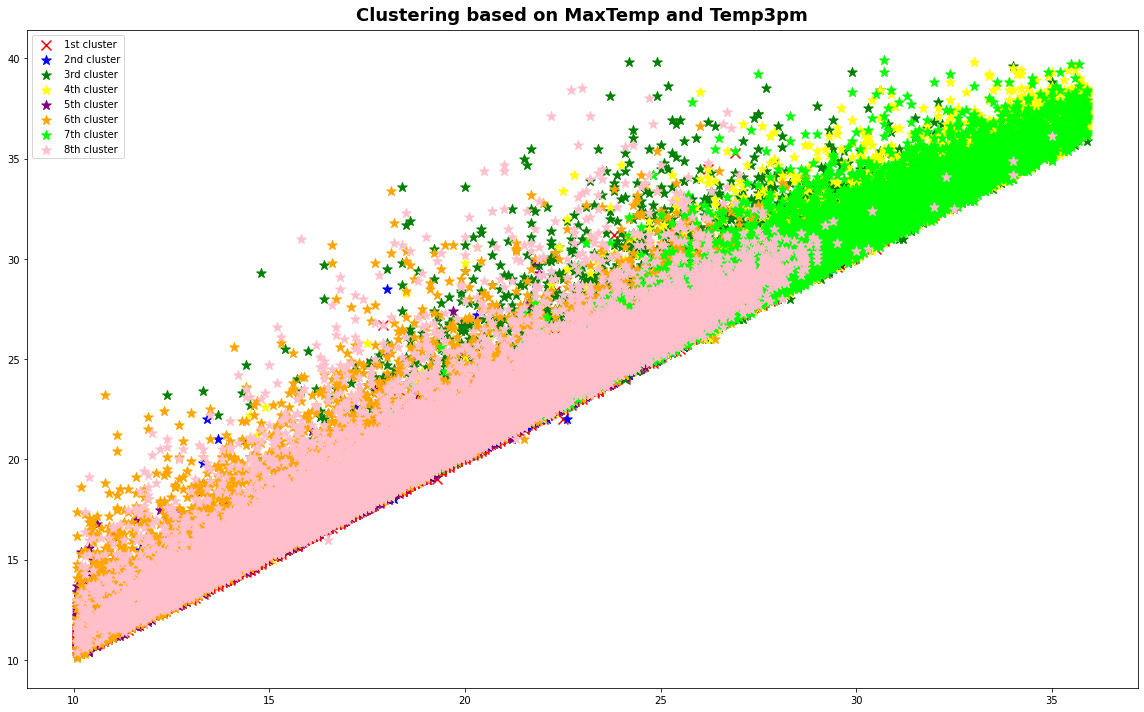

In [ ]:
plt.scatter(df[pred==0][df.columns[7]], df[pred==0][df.columns[1]], s=100, c = 'red', marker = 'x',label = '1st cluster')
plt.scatter(df[pred==1][df.columns[7]], df[pred==1][df.columns[1]], s=100, c = 'blue', marker = '*',label = '2nd cluster')
plt.scatter(df[pred==2][df.columns[7]], df[pred==2][df.columns[1]], s=100, c = 'green', marker = '*',label = '3rd cluster')
plt.scatter(df[pred==3][df.columns[7]], df[pred==3][df.columns[1]], s=100, c = 'yellow', marker = '*',label = '4th cluster')
plt.scatter(df[pred==4][df.columns[7]], df[pred==4][df.columns[1]], s=100, c = 'purple', marker = '*',label = '5th cluster')
plt.scatter(df[pred==5][df.columns[7]], df[pred==5][df.columns[1]], s=100, c = 'orange', marker = '*',label = '6th cluster')
plt.scatter(df[pred==6][df.columns[7]], df[pred==6][df.columns[1]], s=100, c = 'lime', marker = '*',label = '7th cluster')
plt.scatter(df[pred==7][df.columns[7]], df[pred==7][df.columns[1]], s=100, c = 'pink', marker = '*',label = '8th cluster')
plt.title(label = 'Clustering based on MaxTemp and Temp3pm')
plt.legend()
plt.savefig(os.path.join(cwd,'plots','clusterization','Clustering_MaxTempo_Temp3pm.png'),dpi = 400)
plt.show()

While in some categories (features) there is a little more variation in values, in principle the data is quite uniform and does not contain many outliers for such a large data set. The comparision of clusters characterized by features of one 'family' (pressure, temperature, humidity) is quite interesting. In the case of pressure and temperature, different types appear in the distribution of points, they are similar. For clustering based on the temperature (3pm or 9am) differences in distribution are quit well visible. It shows that during the measurement the temperature had the biggest variation in values, while the pressures or humidity during the day did not change.


## Dataset split into  **training, test and validation.**

In [ ]:
df

MinTemp  MaxTemp  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0          13.4     22.9         71.0         22.0       1007.7       1007.1   
1           7.4     25.1         44.0         25.0       1010.6       1007.8   
2          12.9     25.7         38.0         30.0       1007.6       1008.7   
3           9.2     28.0         45.0         16.0       1017.6       1012.8   
4          17.5     32.3         82.0         33.0       1010.8       1006.0   
...         ...      ...          ...          ...          ...          ...   
120376      3.5     21.8         59.0         27.0       1024.7       1021.2   
120377      2.8     23.4         51.0         24.0       1024.6       1020.3   
120378      3.6     25.3         56.0         21.0       1023.5       1019.1   
120379      5.4     26.9         53.0         24.0       1021.0       1016.8   
120380      7.8     27.0         51.0         24.0       1019.4       1016.5   

        Temp9am  Temp3pm  
0          16.9     21.8  
1          17.2     24.3  
2          21.0     23.2  
3          18.1     26.5  
4          17.8     29.7  
...         ...      ...  
120376      9.4     20.9  
120377     10.1     22.4  
120378     10.9     24.5  
120379     12.5     26.1  
120380     15.1     26.0  

[106011 rows x 8 columns]

In [ ]:
Y = df.iloc[:,1:2]
Y

MaxTemp
0          22.9
1          25.1
2          25.7
3          28.0
4          32.3
...         ...
120376     21.8
120377     23.4
120378     25.3
120379     26.9
120380     27.0

[106011 rows x 1 columns]

In [ ]:
X = df.loc[:,~df.columns.isin(['MaxTemp'])]
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X

MinTemp  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0       0.160929     0.107271    -1.531244    -1.671350    -1.396376   
1      -0.854539    -1.468302    -1.376529    -1.199328    -1.281063   
2       0.076307    -1.818429    -1.118669    -1.687627    -1.132802   
3      -0.549898    -1.409947    -1.840676    -0.059964    -0.457394   
4       0.854832     0.749171    -0.963953    -1.166774    -1.577583   
...          ...          ...          ...          ...          ...   
106006 -1.514593    -0.592984    -1.273385     1.095677     0.926370   
106007 -1.633064    -1.059820    -1.428101     1.079400     0.778109   
106008 -1.497669    -0.768047    -1.582816     0.900357     0.580429   
106009 -1.193028    -0.943111    -1.428101     0.493442     0.201541   
106010 -0.786841    -1.059820    -1.428101     0.233016     0.152121   

         Temp9am   Temp3pm  
0      -0.045681 -0.003632  
1       0.006969  0.418742  
2       0.673859  0.232898  
3       0.164916  0.790431  
4       0.112267  1.331070  
...          ...       ...  
106006 -1.361912 -0.155686  
106007 -1.239064  0.097738  
106008 -1.098666  0.452532  
106009 -0.817870  0.722852  
106010 -0.361576  0.705957  

[106011 rows x 7 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
StScaler = StandardScaler()
X_train = StScaler.fit_transform(X_train)
X_test= StScaler.transform(X_test)
y_train = StScaler.fit_transform(y_train)
y_test= StScaler.transform(y_test)

In [ ]:
X_train_v, X_valid, y_train_v, y_valid = train_test_split(X_train,y_train, test_size = 0.25, random_state = 42)


X_train_v, y_train_v - Part of the dataset which will be used for initial training of the models.

X_valid, y_valid - Part of the dataset which will be used for initial testing of the models.

X_train,y_train - Part of the dataset which will be used for trainign of the best model.

X_test, y_test - Part of the dataset which will be used for testing of the best model.

## Implementation of various models and selectino of the best 

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error


### Linear regression

In [ ]:
LinReg = LinearRegression()
LinReg.fit(X_train_v,y_train_v)
y_train_pred = LinReg.predict(X_train_v)
y_pred = LinReg.predict(X_valid)


print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred)}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f'Score for training: {LinReg.score(X_train_v, y_train_v)}')
print(f'Score for testing: {LinReg.score(X_valid, y_valid)}')

Mean Squared Error: 0.029462118443637973
Root Mean Squared Error: 0.17164532747394545
Score for training: 0.9716210095988439
Score for testing: 0.9705120296734662


#### Search for best parameteres

In [ ]:
params = {'n_jobs': [1,5,10,20,30,40,50],
          'fit_intercept' :['True','False'],
          }

LinReg = LinearRegression()
GSearch_CV = GridSearchCV(LinReg,params ,cv = None, scoring = None, return_train_score = True)
GSearch_CV.fit(X_valid, y_valid.ravel())
print(f'Best params: {GSearch_CV.best_params_}')

Best params: {'fit_intercept': 'True', 'n_jobs': 1}


#### LR with optimized parameters

In [ ]:
LinReg = LinearRegression(fit_intercept = True, n_jobs = 1)
LinReg.fit(X_train_v,y_train_v)
y_train_pred = LinReg.predict(X_train_v)
y_pred = LinReg.predict(X_valid)


print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred)}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f'Score for training: {LinReg.score(X_train_v, y_train_v)}')
print(f'Score for testing: {LinReg.score(X_valid, y_valid)}')

Mean Squared Error: 0.029462118443637973
Root Mean Squared Error: 0.17164532747394545
Score for training: 0.9716210095988439
Score for testing: 0.9705120296734662


### Decission tree

In [ ]:
DTregr = DecisionTreeRegressor(random_state = 42)
DTregr = DTregr.fit(X_train_v,y_train_v)
y_train_pred = DTregr.predict(X_train_v)
y_pred = DTregr.predict(X_valid)


print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred)}')
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f"Score for training: {DTregr.score(X_train_v,y_train_v)}")
print(f"Score for testing: {DTregr.score(X_valid,y_valid)}")

Mean Squared Error: 0.04658086614411022
Root Mean Squared Error: 0.2158260089611774
Score for training: 1.0
Score for testing: 0.9533782609261631


#### Search for best parameteres

In [ ]:
params =  {    'max_depth': [x for x in range(5,11)], 
               'splitter' : ['best', 'random'],
               'criterion': ['squared_error', 'friedman_mse'],
               }  

DTregr = DecisionTreeRegressor(random_state = 42)

GSearch_CV = GridSearchCV(DTregr,params ,cv = None, scoring = None, return_train_score = True)
GSearch_CV.fit(X_valid, y_valid.ravel())
print(f'Best params: {GSearch_CV.best_params_}')

Best params: {'criterion': 'friedman_mse', 'max_depth': 7, 'splitter': 'best'}


#### Model with optimized parameters

In [ ]:
DTregr = DecisionTreeRegressor(random_state = 42, max_depth = 7, criterion = 'friedman_mse', splitter = 'best')
DTregr = DTregr.fit(X_train_v,y_train_v)
y_train_pred = DTregr.predict(X_train_v)
y_pred = DTregr.predict(X_valid)


print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred)}')
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f"Score for training: {DTregr.score(X_train_v,y_train_v)}")
print(f"Score for testing: {DTregr.score(X_valid,y_valid)}")

Mean Squared Error: 0.0260046487220804
Root Mean Squared Error: 0.16125956939692107
Score for training: 0.9757360229091808
Score for testing: 0.9739725331925603


### Random Forest Regressor

#### RFR with dfault parameteres

In [ ]:
RFregr = RandomForestRegressor(random_state = 42)
RFregr = RFregr.fit(X_train_v,y_train_v.ravel())
y_train_pred = RFregr.predict(X_train_v)
y_pred = RFregr.predict(X_valid)


print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred.ravel())}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred.ravel()))}')
print(f"Score for training: {RFregr.score(X_train_v,y_train_v.ravel())}")
print(f"Score for testing: {RFregr.score(X_valid,y_valid.ravel())}")

Mean Squared Error: 0.023685372575218275
Root Mean Squared Error: 0.15390052818368843
Score for training: 0.9967507271312528
Score for testing: 0.9762938444155989


####  Search for optimal parameters 

In [ ]:
params =  {    'max_depth': [7,8,9,10,11], 
               'min_samples_leaf' :[1,2,3,4,5,6,7,8,9,10],
               }  

RFregr = RandomForestRegressor(random_state = 42)

GSearch_CV = GridSearchCV(RFregr,params ,cv = None, scoring = None, return_train_score = True)
GSearch_CV.fit(X_valid, y_valid.ravel())
print(f'Best params: {GSearch_CV.best_params_}')

Best params: {'max_depth': 10, 'min_samples_leaf': 3}


#### Random forest regressor with optimal parameters

In [ ]:
RFregr = RandomForestRegressor(random_state = 42, max_depth = 10,min_samples_leaf = 3)
RFregr = RFregr.fit(X_train_v,y_train_v.ravel())
y_train_pred = RFregr.predict(X_train_v)
y_pred = RFregr.predict(X_valid)


print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred.ravel())}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred.ravel()))}')
print(f"Score for training: {RFregr.score(X_train_v,y_train_v.ravel())}")
print(f"Score for testing: {RFregr.score(X_valid,y_valid.ravel())}")

Mean Squared Error: 0.02301563721914589
Root Mean Squared Error: 0.15170905450613648
Score for training: 0.9820100291642799
Score for testing: 0.976964167438849


### Voting regressor



#### Voting regressor with default parameters

In [ ]:
voter1 = LinearRegression()
voter2 = RandomForestRegressor(random_state = 42)
Vreg = VotingRegressor([('lr', voter1), ('rf', voter2)])
Vreg = Vreg.fit(X_train_v, y_train_v.ravel())

y_train_pred = Vreg.predict(X_train_v)
y_pred = Vreg.predict(X_valid)


print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred.ravel())}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f"Score for training: {Vreg.score(X_train_v,y_train_v.ravel())}")
print(f"Score for testing: {Vreg.score(X_valid,y_valid.ravel())}")

Mean Squared Error: 0.02622299180457423
Root Mean Squared Error: 0.16193514690941627
Score for training: 0.9750428803488536
Score for testing: 0.9737539985223567


#### Search for optimal parameters for Voting regressor

In [ ]:
Vreg = VotingRegressor(estimators = [('lr',LinearRegression()),('rf',RandomForestRegressor(random_state = 42))])
params = {
          'lr__fit_intercept' :['True','False'],
          
          'rf__max_depth': [5,6,7,8,9], 
          'rf__min_samples_leaf' :[4,5,7,8,9,10],
          }

GSearch_CV = GridSearchCV(Vreg,params ,cv = None, scoring = None, return_train_score = True)
GSearch_CV.fit(X_valid, y_valid.ravel())
print(f'Best params: {GSearch_CV.best_params_}')

Best params: {'lr__fit_intercept': 'True', 'rf__max_depth': 9, 'rf__min_samples_leaf': 4}


#### Voting regressor with optimized parameters

In [ ]:
voter1 = LinearRegression(fit_intercept = True)
voter2 = RandomForestRegressor(random_state = 42, max_depth = 9, min_samples_leaf = 4)
Vreg = VotingRegressor([('lr', voter1), ('rf', voter2)])
Vreg = Vreg.fit(X_train_v, y_train_v.ravel())

y_train_pred = Vreg.predict(X_train_v)
y_pred = Vreg.predict(X_valid)


print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred.ravel())}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f"Score for training: {Vreg.score(X_train_v,y_train_v.ravel())}")
print(f"Score for testing: {Vreg.score(X_valid,y_valid.ravel())}")

Mean Squared Error: 0.02446546218539892
Root Mean Squared Error: 0.15641439251360126
Score for training: 0.9778435237045568
Score for testing: 0.9755130703066002


### Bagging Regressor


#### Bagging regressor with default parameters

In [ ]:
bag_reg = BaggingRegressor()
bag_reg = bag_reg.fit(X_train_v, y_train_v.ravel())

y_train_pred = bag_reg.predict(X_train_v)
y_pred = bag_reg.predict(X_valid)

print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred.ravel())}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f"Score for training: {bag_reg.score(X_train_v,y_train_v.ravel())}")
print(f"Score for testing: {bag_reg.score(X_valid,y_valid.ravel())}")

Mean Squared Error: 0.02579484004474713
Root Mean Squared Error: 0.1606077209997923
Score for training: 0.9954535423028082
Score for testing: 0.9741825259689891


#### Search for optimal parameters

In [ ]:
bag_reg = BaggingRegressor()
params = {
          'bootstrap' : [True,False],
          'base_estimator' : [LinearRegression(),KNeighborsRegressor(),SVR()]
          }

GSearch_CV = GridSearchCV(bag_reg,params ,cv = None, scoring = None, return_train_score = True)
GSearch_CV.fit(X_valid, y_valid.ravel())
print(f'Best params: {GSearch_CV.best_params_}')

Best params: {'base_estimator': SVR(), 'bootstrap': False}


#### Bagging regressor with optimal parametrers

In [ ]:
bag_reg = BaggingRegressor(base_estimator = SVR(), bootstrap = False, n_estimators = 5)
bag_reg = bag_reg.fit(X_train_v, y_train_v.ravel())

y_train_pred = bag_reg.predict(X_train_v)
y_pred = bag_reg.predict(X_valid)

print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred.ravel())}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f"Score for training: {bag_reg.score(X_train_v,y_train_v.ravel())}")
print(f"Score for testing: {bag_reg.score(X_valid,y_valid.ravel())}")

Mean Squared Error: 0.02186111957209647
Root Mean Squared Error: 0.14785506272054558
Score for training: 0.97895933425596
Score for testing: 0.9781196981310082


### Gradient Boosting Regressor


In [ ]:
GB_regressor = GradientBoostingRegressor(random_state = 42)
GB_regressor.fit(X_train, y_train.ravel())

y_train_pred = GB_regressor.predict(X_train_v)
y_pred = GB_regressor.predict(X_valid)
print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred)}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f"Score for training: {GB_regressor.score(X_train_v,y_train_v.ravel())}")
print(f"Score for testing: {GB_regressor.score(X_valid,y_valid.ravel())}")

Mean Squared Error: 0.022673471814083475
Root Mean Squared Error: 0.15057712912020696
Score for training: 0.9776808060589557
Score for testing: 0.9773066330809769


#### Search for optimal parameters for Gradient  Boosting regressor

In [ ]:
GB_regressor = GradientBoostingRegressor(random_state = 42)
params = {
          'loss': ['squared_error', 'huber', 'quantile'],
          'criterion': ['friedman_mse', 'squared_error'],
          'max_depth': [2,3,4,5,6]
          }

GSearch_CV = GridSearchCV(GB_regressor,params ,cv = None, scoring = None, return_train_score = True)
GSearch_CV.fit(X_valid, y_valid.ravel())
print(f'Best params: {GSearch_CV.best_params_}')

Best params: {'criterion': 'squared_error', 'loss': 'squared_error', 'max_depth': 4}


#### Gradient boosting regressor withb optimal parameters

In [ ]:
GB_regressor = GradientBoostingRegressor(random_state = 42, criterion = 'squared_error', loss = 'squared_error', max_depth = 4)
GB_regressor.fit(X_train, y_train.ravel())

y_train_pred = GB_regressor.predict(X_train_v)
y_pred = GB_regressor.predict(X_valid)
print(f'Mean Squared Error: {mean_squared_error(y_valid, y_pred)}' )
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(y_valid, y_pred))}')
print(f"Score for training: {GB_regressor.score(X_train_v,y_train_v.ravel())}")
print(f"Score for testing: {GB_regressor.score(X_valid,y_valid.ravel())}")

Mean Squared Error: 0.021340106214353123
Root Mean Squared Error: 0.14608253220133174
Score for training: 0.9789855713182545
Score for testing: 0.97864116865806


## Results:
### Linear regression:
Mean Squared Error: 0.029462118443637973

Root Mean Squared Error: 0.17164532747394545

Score for training: 0.9716210095988439

Score for testing: 0.9705120296734662


### Decision tree
Mean Squared Error: 0.0260046487220804

Root Mean Squared Error: 0.16125956939692107

Score for training: 0.9757360229091808

Score for testing: 0.9739725331925603


### Random forest regressor
Mean Squared Error: 0.02301563721914589

Root Mean Squared Error: 0.15170905450613648

Score for training: 0.9820100291642799

Score for testing: 0.976964167438849

### Voting regressor
Mean Squared Error: 0.02446546218539892

Root Mean Squared Error: 0.15641439251360126

Score for training: 0.9778435237045568

Score for testing: 0.9755130703066002

### Bagging regressor
Mean Squared Error: 0.02186111957209647

Root Mean Squared Error: 0.14785506272054558

Score for training: 0.97895933425596

Score for testing: 0.9781196981310082


### Gradient boosting regressor
Mean Squared Error: 0.021340106214353123

Root Mean Squared Error: 0.14608253220133174

Score for training: 0.9789855713182545

Score for testing: 0.97864116865806

## Choosing of the finall model

After comparing results decided to use Bagging regressor as it has one of the best scores and as well low values of MSE and RMSE 

# Otimization and test

In [ ]:
Regression = BaggingRegressor(base_estimator = SVR(), bootstrap = False, n_estimators = 5)
Regression.fit(X_train, y_train.ravel())

y_pred = GB_regressor.predict(X_test)
print(f'\nMean Squared Error: {mean_squared_error(y_test, y_pred)}' )
print(f'\nRoot Mean Squared Error: { np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'\nScore for finall validation: {GB_regressor.score(X_test,y_test.ravel())}')


Mean Squared Error: 0.02229492626991477

Root Mean Squared Error: 0.1493148561594417

Score for finall validation: 0.9777955166400502


### Conclussion

Bagging regressor using SVR as a base estimator turned out to be the best metohd out of all tested. Remainign models achieved results close to the winner. Overall accuracy of the predictions is satisfaing.

Bagging regressor using SVR is a well known combination: 
- Anjali Bhavana, Pankaj Chauhanb, Hitkulc, Rajiv Ratn Shah 'Bagged support vector machines for emotion recognition from speech',Knowledge-Based Systems
Volume 184, 15 November 2019, DOI: 10.1016/j.knosys.2019.104886
- Hyun-Chul Kim, S. Pang, Hong-Mo Je, Daijin Kim 'Support Vector Machine Ensemble with Bagging',Lecture Notes in Computer Science, January 2002, 2388:397-407
- Yu-Feng Deng, Xing Jin, Yi-Xin Zhong 'Ensemble SVR for prediction of time series'Machine Learning and Cybernetics, 2005. Proceedings of 2005 International Conference onVolume: 6, DOI: 10.1109/ICMLC.2005.1527553